In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import scipy as sc

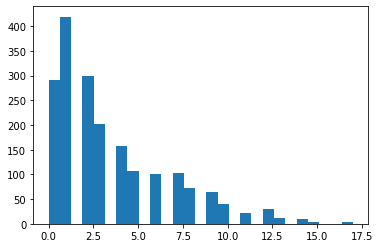

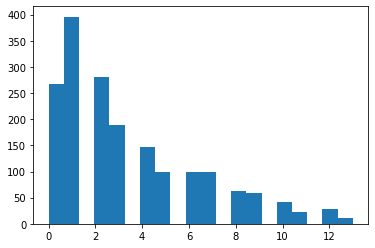

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [2]:
diabetes_df = pd.read_csv(Path('diabetes-dataset.csv'))
pimaData_df = pd.read_csv(Path('diabetes_PIMA_INDIANS.csv'))
# plt.hist(diabetes_df[''])
# diabetes_df
diabetes_df = pd.DataFrame(diabetes_df)
pimaData_df = pd.DataFrame(pimaData_df)
merged_diabetes_df = pd.concat([diabetes_df, pimaData_df])
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['BloodPressure'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['Glucose'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['BMI'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['SkinThickness'] != 0]


bp = merged_diabetes_df['BloodPressure']
glucose = merged_diabetes_df['Glucose']
bmi = merged_diabetes_df['BMI']
age = merged_diabetes_df['Age']
skin_thickness = merged_diabetes_df['SkinThickness']
dpf = merged_diabetes_df['DiabetesPedigreeFunction']

# # merged_diabetes_df['ln_bp'] = np.log(bp)
# # merged_diabetes_df['ln_glucose'] = np.log(glucose)
# # merged_diabetes_df['ln_bmi'] = np.log(bmi)
# # merged_diabetes_df['ln_skin'] = np.log(skin_thickness)
# # merged_diabetes_df['ln_dpf'] = np.log(dpf)


## GETTING RID OF OUTLIERS 
z_scores = sc.stats.zscore(merged_diabetes_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cleaned_merged_df = merged_diabetes_df[filtered_entries]

plt.hist(merged_diabetes_df['Pregnancies'], bins='auto')
plt.show()
plt.hist(cleaned_merged_df['Pregnancies'], bins='auto')
plt.show()
cleaned_merged_df


In [3]:
bp = cleaned_merged_df['BloodPressure']
glucose = cleaned_merged_df['Glucose']
bmi = cleaned_merged_df['BMI']
age = cleaned_merged_df['Age']
skin_thickness = cleaned_merged_df['SkinThickness']
dpf = cleaned_merged_df['DiabetesPedigreeFunction']

cleaned_merged_df['ln_pregnancies'] = np.log(cleaned_merged_df['Pregnancies'])
cleaned_merged_df['ln_glucose'] = np.log(glucose)
cleaned_merged_df['ln_bp'] = np.log(bp)
cleaned_merged_df['ln_skin'] = np.log(skin_thickness)
cleaned_merged_df['ln_insulin'] = np.log(cleaned_merged_df['Insulin'])
cleaned_merged_df['ln_bmi'] = np.log(bmi)
cleaned_merged_df['ln_dpf'] = np.log(dpf)
cleaned_merged_df['ln_age'] = np.log(cleaned_merged_df['Age'])


ln_cleaned_merged_df = cleaned_merged_df[['ln_pregnancies', 'ln_glucose', 'ln_bp', 'ln_skin', 'ln_insulin', 'ln_bmi', 'ln_dpf', 'ln_age', 'Outcome']]

ln_cleaned_merged_df = ln_cleaned_merged_df[~ln_cleaned_merged_df.isin([np.nan, np.inf, -np.inf]).any(1)]
# ln_cleaned_merged_df.loc[~(ln_cleaned_merged_df==0).all(axis=1)]
ln_cleaned_merged_df = ln_cleaned_merged_df[ln_cleaned_merged_df['ln_pregnancies'] != 0]
normal_cleaned_merged_df = cleaned_merged_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
cleaned_merged_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-c2c1c77ac874>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_df['ln_pregnancies'] = np.log(cleaned_merged_df['Pregnancies'])
<ipython-input-3-c2c1c77ac874>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_df['ln_glucose'] = np.log(glucose)
<ipython-input-3-c2c1c77ac874>:10: SettingWithC

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ln_pregnancies,ln_glucose,ln_bp,ln_skin,ln_insulin,ln_bmi,ln_dpf,ln_age
0,2,138,62,35,0,33.6,0.127,47,1,0.693147,4.927254,4.127134,3.555348,-inf,3.514526,-2.063568,3.850148
1,0,84,82,31,125,38.2,0.233,23,0,-inf,4.430817,4.406719,3.433987,4.828314,3.642836,-1.456717,3.135494
3,0,135,68,42,250,42.3,0.365,24,1,-inf,4.905275,4.219508,3.737670,5.521461,3.744787,-1.007858,3.178054
5,0,173,78,32,265,46.5,1.159,58,0,-inf,5.153292,4.356709,3.465736,5.579730,3.839452,0.147558,4.060443
6,4,99,72,17,0,25.6,0.294,28,0,1.386294,4.595120,4.276666,2.833213,-inf,3.242592,-1.224176,3.332205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1,2.197225,5.135798,4.304065,3.433987,-inf,3.784190,-0.908819,3.761200
763,10,101,76,48,180,32.9,0.171,63,0,2.302585,4.615121,4.330733,3.871201,5.192957,3.493473,-1.766092,4.143135
764,2,122,70,27,0,36.8,0.340,27,0,0.693147,4.804021,4.248495,3.295837,-inf,3.605498,-1.078810,3.295837
765,5,121,72,23,112,26.2,0.245,30,0,1.609438,4.795791,4.276666,3.135494,4.718499,3.265759,-1.406497,3.401197


In [4]:
## ln_values
ln_cleaned_merged_df.groupby('Outcome').mean()
X = ln_cleaned_merged_df.drop(columns= 'Outcome', axis=1)
y = ln_cleaned_merged_df['Outcome']

scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)

X = standardized_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

print(f'The shape of our standardized data is: {X.shape}, The shape of our trained data is: {X_train.shape}, The shape of our test data is: {X_test.shape}')

classifier = svm.SVC(kernel= 'linear')

classifier.fit(X_train, y_train)
X_train_perdict = classifier.predict(X_train)
training_data_acc = accuracy_score(X_train_perdict , y_train)

print(f'Our training data is {training_data_acc*100}% accurate')

The shape of our standardized data is: (809, 8), The shape of our trained data is: (647, 8), The shape of our test data is: (162, 8)
Our training data is 81.2982998454405% accurate


In [12]:
input_data = [1.609438, 4.795791, 4.276666, 3.135494, 4.718499, 3.265759, -1.406497, 3.401197]

def diabetes_function(input_data): 
    input_data_np_array = np.asarray(input_data)

    #reshape data
    input_data_reshape = input_data_np_array.reshape(1, -1)

    #standardize input data 
    std_data = scaler.transform(input_data_reshape)

    print(std_data)

    prediction = classifier.predict(std_data)
    print(prediction)

    if (prediction[0] == 0):
        print('You do not have diabetes!')
    else:
        print('You do have diabetes!')
        
diabetes_function(input_data)

[[-0.56234055 -3.83666375 -5.85957906 -2.5674783  -1.04289586 -4.53700133
  -6.46744996 -2.77099927]]
[0]
You do not have diabetes!


In [9]:
## Normal Values

normal_cleaned_merged_df.groupby('Outcome').mean()
X = normal_cleaned_merged_df.drop(columns= 'Outcome', axis=1)
y = normal_cleaned_merged_df['Outcome']

scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)

X = standardized_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

print(f'The shape of our standardized data is: {X.shape}, The shape of our trained data is: {X_train.shape}, The shape of our test data is: {X_test.shape}')

classifier = svm.SVC(kernel= 'linear')

classifier.fit(X_train, y_train)
X_train_perdict = classifier.predict(X_train)
training_data_acc = accuracy_score(X_train_perdict , y_train)

print(f'Our training data is {training_data_acc*100}% accurate')

The shape of our standardized data is: (1801, 8), The shape of our trained data is: (1440, 8), The shape of our test data is: (361, 8)
Our training data is 80.625% accurate


The Perdictive system


In [13]:
# Randomly selected data for 0 outcome (no diabetes)
pregnancies = int(input('How many times have you been pregnant? '))
glucose = int(input('Enter an input for Glucose: '))
blood_pressure = int(input('Enter an input for Blood Presure: '))
skin_thickness = int(input('Enter an input for skin thickness: '))
insulin = int(input('Enter an input for Insulin: '))
bmi = float(input('Enter your BMI: '))
dpf = float(input('Enter your DPF: '))
age = int(input('Enter your age: '))
input_data = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age)


# def diabetes_function(input_data): 
#     input_data_np_array = np.asarray(input_data)

#     #reshape data
#     input_data_reshape = input_data_np_array.reshape(1, -1)

#     #standardize input data 
#     std_data = scaler.transform(input_data_reshape)

#     print(std_data)

#     prediction = classifier.predict(std_data)
#     print(prediction)

#     if (prediction[0] == 0):
#         print('You do not have diabetes!')
#     else:
#         print('You do have diabetes!')
        
diabetes_function(input_data)



[[ 0.52042265  0.06051997  0.04697359 -0.57640706  0.11474959 -0.99472164
  -0.80639684 -0.11312931]]
[0]
You do not have diabetes!


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
X = cleaned_merged_df[['BloodPressure', 'Glucose', 'BMI', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']]
y = cleaned_merged_df['Outcome']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)
# fact_df = merged_diabetes_df.drop('Outcome', axis = 1)
# outcome_df = merged_diabetes_df.Outcome

# X = fact_df
# y = outcome_df
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

# train1 = classifier.score(X_train, y_train)
# test1 = classifier.score(X_test, y_test)

# print(f'training score = {train1}')
# print(f'testing score = {test1}')
# Y = 4.127134*(0.14690869) + 4.927254*(0.78777203) + 3.514526*(0.25026754) + 3.555348*(0.08121834) - 2.063568*(0.10741898)
# print(Y)


[0.00120017 0.0062259  0.0064053  0.00284563 0.25693349 0.00749543]


In [ ]:
factors_df = diabetes_df.drop('Outcome', axis = 1)
#Ind_df = pd.get_dummies(Independent_df)
factors_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [ ]:
diab_out_df = diabetes_df.Outcome
diab_out_df.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [ ]:
# Split into train and test data:
X = factors_df
y = diab_out_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier2 = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7926666666666666
Logistic Regression Testing Data Score: 0.734


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {clf.score(X_test, y_test)}')

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.974


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier2.fit(X_train_scaled, y_train)
print(f"Logistic Regression Scaled Training Data Score: {classifier2.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Scaled Testing Data Score: {classifier2.score(X_test_scaled, y_test)}")

Logistic Regression Scaled Training Data Score: 0.7913333333333333
Logistic Regression Scaled Testing Data Score: 0.736


In [ ]:
clf2 = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {clf2.score(X_test_scaled, y_test)}')

Random Forest Scaled Training Score: 1.0
Random Forest Scaled Testing Score: 0.974


###  No Difference between scaled and unscaled data!